# Titanic (Metrowest Boston Developers Machine Learning Group)
This the intro to Kaggle "Titanic" dataset. Content here is taken in large part from
* https://www.kaggle.com/maf345/titanic-data-set-a-beginner-friendly-solution
* https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook
* https://www.kaggle.com/c/titanic/data

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# get the data
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')
combine = [train_df, test_df]
foo = np.array([[2,3,4],[4,5,6]])

# Get familiar with the dataset

In [20]:
# show the first few training instances
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
# show the first few test instances (no "Survived")
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
# show the attribute types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# describe the numeric attributes
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# describe the categorical attributes
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Master. Urho Abraham",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
# check for nulls - this should not be a surprise
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Preliminary analyze by correlation...
### corr() only includes attributes that are numeric

In [23]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### "groupby" to investigate nominal attributes

In [24]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Now I am following:
https://www.kaggle.com/maf345/titanic-data-set-a-beginner-friendly-solution

* Exploratory Data Analysis by Visualization
* Data Cleaning
* converting Categorical Features
* Feature Selection
* Applying Logistic Regression 
* Kaggle Submission

In [40]:
train = train_df
test = test_df

# Exploratory Data Analysis by Visualization

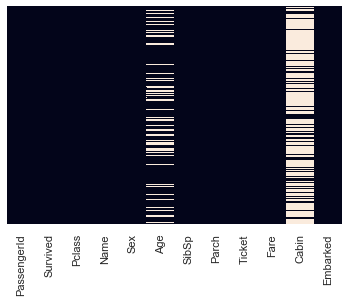

In [41]:
# Using seaborn's heatmap to explore the missing values:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [42]:
# -> Age and Cabin have a lot of missing values

In [43]:
train.isnull().sum()       #More easy way to count the number null values. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

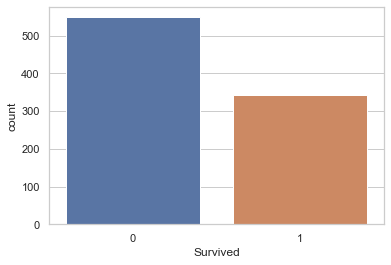

In [44]:
# Visualizing Number of passengers Survived or Not:

sns.set(style = 'whitegrid')
sns.countplot(x = 'Survived', data = train)

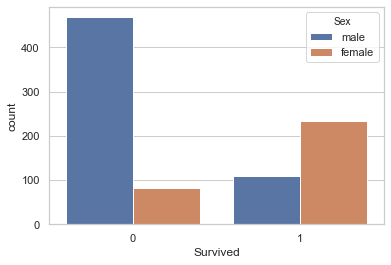

In [45]:
# Visualizing Number of passengers Survived or Not based on Sex:

sns.countplot(x = 'Survived', hue = 'Sex', data = train)

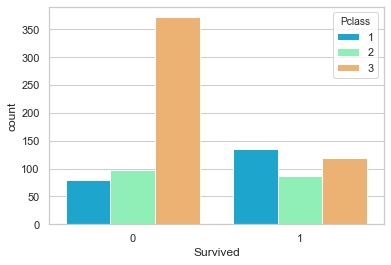

In [46]:
# Visualizing Number of passengers Survived or Not based on Passenger Class:

sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

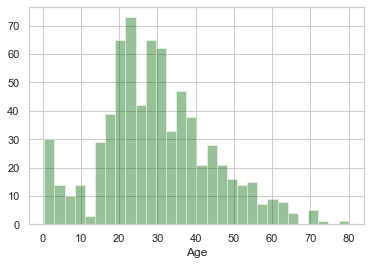

In [47]:
# Getting an idea about the age of passengers:

sns.distplot(train['Age'].dropna(), kde = False, color = 'darkgreen', bins = 30)   #setting kde false to view histogram.

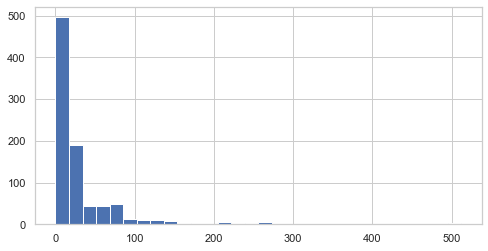

In [48]:
# Visualizing various price range of ticket: 

train['Fare'].hist(bins = 30, figsize = (8, 4))

# Data Cleaning

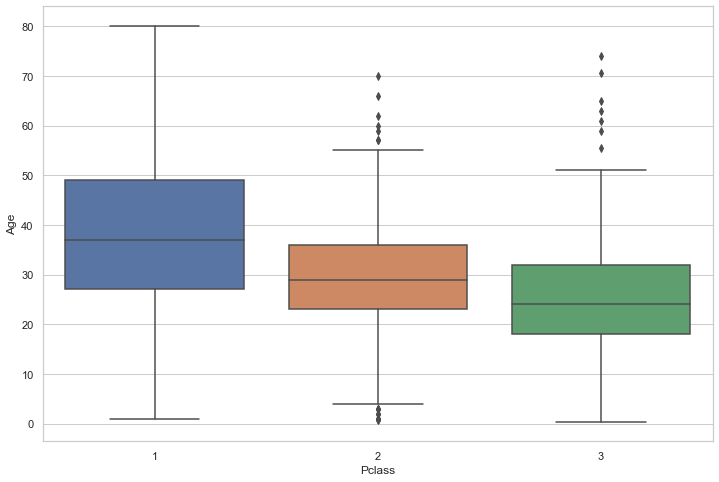

In [49]:
# We will fill the missing Age data with the mean age of passenger of each class
# Finding the mean age of each passenger class:

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [54]:
train[["Pclass", "Age"]].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [56]:
# Setting the Missing Age values with Mean Age on the basis of Passenger Class:

def mean_age_finder(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [57]:
# Updating the Age column with apply() method:

train['Age'] = train[['Age', 'Pclass']].apply(mean_age_finder, axis = 1)


In [58]:
# Verifying if there is any null value in Age column:

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# more to come...